0.4508
0.1656
0.4942
0.2861
0.5024
0.5046
0.5636
0.2015
0.0256
0.0988
Наблюдаемые значения: [17. 15.  7.  6. 12.  8.  9. 11.  4. 11.]
Ожидаемое значение = 10
14.6


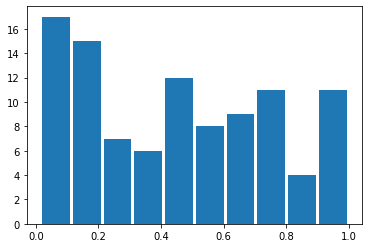

In [4]:
import sympy as sp
import matplotlib.pyplot as plt

def resid3(n, z):
    arr = [z]
    for i in range(n - 1):
        arr.append((arr[i] + 58)**1.6//10% 10000)
    return [x / 10000 for x in arr]

x = resid3(100, 4508)  
for i in range(10):
    print(x[i])
    
def xi(vals, expected):
    res = 0
    for i in vals:
        res += ((i - expected)**2 / expected)
    return res

vals = plt.hist(x, rwidth=0.9)[0]
print(f'Наблюдаемые значения: { vals }\nОжидаемое значение = { 10 }')

print(xi(vals, 10))

Наблюдаемые значения: [1665. 1079.  787.  978. 1080.  881. 1078.  881.  878.  693.]
Ожидаемое значение = 1000
644.2579999999999


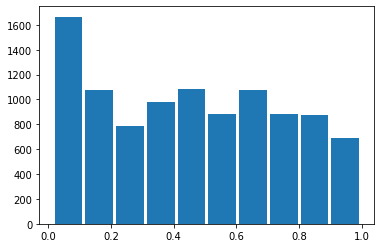

In [5]:
x = resid3(10000, 4508) 
vals = plt.hist(x, rwidth=0.9)[0]
print(f'Наблюдаемые значения: { vals }\nОжидаемое значение = { 1000 }')
print(xi(vals, 1000))

[489, 497, 778, 296, 587, 686]
322.39


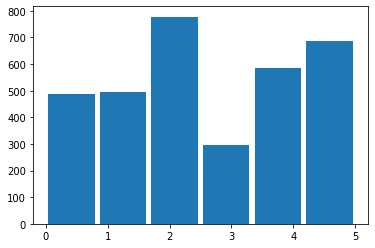

In [6]:
def get_triple_rang(a, b, c):
    triplet = []
    for val in [a, b, c]:
        if val == max(a, b, c):
            triplet.append(3)
        elif val == min(a, b, c):
            triplet.append(1)
        else:
            triplet.append(2)
    return triplet


def get_triplets(x):
    triplets = []
    for i in range(0, 9999, 3):
        triplets.append(get_triple_rang(x[i], x[i + 1], x[i + 2]))
    return triplets

triplets = get_triplets(resid3(9999, 4508))
permutations = [list(l) for l in list(set(tuple(row) for row in triplets))]

change = {}
i = 0
for p in permutations:
    change[str(p)] = i
    i+=1

numbers = [change[str(t)] for t in triplets]
a = plt.hist(numbers, bins=6, rwidth=0.9)
e = [int(a) for a in a[0]]
print(e)
print(xi(e, 500))